**Objective:** The goal of this project is to create a Python script that will compare composition between two microbial communities (using Jaccard similarity). I then aim to visually represent this similarity in a proportional Venn diagram figure.  
**Outcomes:** I want the script to output a Jaccard index value (a number value to quantify beta diversity of the two microbial communities), and I also want it to create a visual representation of the overlap in similarity. This figure will look like a proportional Venn diagram (see Figure 1 below for a conceptual drawing of how it might appear).  
  
<img src="venndiagram.jpg" alt="sketch_image" width="400"/>

In [11]:
# Calculates Jaccard index between two microbial communities
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
root = '/Users/HP/Desktop/Coding'
dataset_dir = root + '/introcoding-spring-2019/Datasets/'
glob.os.chdir(dataset_dir)
a = open('microbial_community_a.txt').read().split('\n')
b = open('microbial_community_b.txt').read().split('\n')

In [4]:
# Determine how many members are shared between the two sets
shared_OTUs = set(a) & set(b)
number_shared_OTUs = len(shared_OTUs)

In [5]:
# Calculates total number of elements in both lists
total_OTUs = len(a) + len(b)

In [6]:
Jaccard = number_shared_OTUs / total_OTUs
#print(Jaccard)

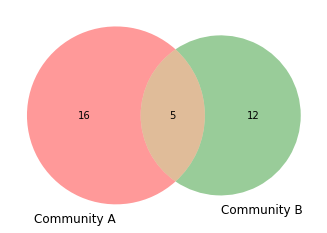

In [9]:
from matplotlib_venn import venn2
venn2(subsets = (len(a), len(b), len(shared_OTUs)), set_labels=('Community A', 'Community B'))

In [36]:
colnames = ['Puy', 'Tac', 'Pich']
data = pd.read_csv('/Users/HP/Desktop/Coding/project/stream_data.csv', names=colnames)
puy = data['Puy'].dropna().unique().tolist()

In [37]:
tac = data['Tac'].dropna().unique().tolist()

pich = data['Pich'].dropna().unique().tolist()

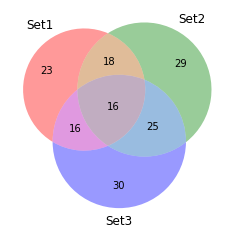

In [38]:
#Differences between three drainages (Puy, Tac, Pich)
from matplotlib_venn import venn3

puy_tac_shared = set(puy) & set(tac)
puy_pich_shared = set(puy) & set(pich)
tac_pich_shared = set(tac) & set(pich)
all_shared = set(puy) & set(tac) & set(pich)
venn3(subsets = (len(puy), len(tac), len(puy_tac_shared), len(pich), len(puy_pich_shared), len(tac_pich_shared), len(all_shared)), set_labels = ('Set1', 'Set2', 'Set3'))

Text(0.5, 1.0, '$\\frac{|A \\cap B|}{|A \\cup B|}$')

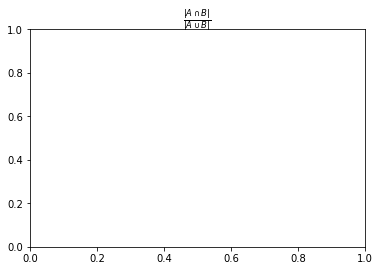

In [29]:
plt.title(r'$\frac{|A \cap B|}{|A \cup B|}$')